# Causal interpretability for Software Engineering 

In this notebook we present a full excercise on the use of SE dataset and the causal effect analysis for software engineering.

## Introduction Interpretability for SE

What is Interpretability for SE?

## Case of study

### Correlation analysis??

### Causal analysis

You can download SEMERU datasets at  https://huggingface.co/semeru

In [46]:
from datasets import load_dataset
import pandas as pd

In [3]:
d_control = "semeru/Code-code-galeras-prompting-3k-control"

In [4]:
t1 = "semeru/Code-code-galeras-prompting-3k-treatment-1"

In [47]:
dataset = "semeru/Code-code-galeras-prompting-3k-treatment-2"

In [27]:
treatments = "semeru/galeras-causal4se-3k-levenshtein"

In [48]:
dataset = load_dataset(dataset, cache_dir="../../datax" )

In [49]:
dataset.set_format(type='pandas')

In [50]:
df = dataset['train'][:]

Stablish confunder variables as $w\in W$

In [51]:
columns={'vocab_size':'w_vocab_size','n_words':'w_n_words','n_ast_errors':'w_n_ast_errors','ast_levels':'w_ast_levels','n_whitespaces':'w_n_whitespaces','complexity':'w_complexity','nloc':'w_nloc','token_counts':'w_token_counts','n_ast_nodes':'w_n_ast_nodes','ast_errors':'w_ast_errors','n_identifiers':'w_n_identifiers'}
df = df.rename(columns=columns)
df

,w_token_counts,file_name,d_id,control,w_n_ast_errors,documentation,w_n_whitespaces,w_complexity,path,w_ast_levels,...,w_n_ast_nodes,commit_message,w_n_identifiers,url,T2,T1,fun_name,w_n_words,code,repo
0,48,groupby.py,40113,"{'predicted': {'n_whitespaces': 77, 'n_words':...",0,{'docstring': ' Return a rolling group...,101,1,pandas/core/groupby/groupby.py,9,...,71,TYP: more return annotations in core/ (#47618)...,13,https://github.com/pandas-dev/pandas.git,"{'predicted': {'n_whitespaces': 45, 'n_words':...","{'predicted': {'n_whitespaces': 82, 'n_words':...",rolling,18,"def rolling(self, *args, **kwargs) -> RollingG...",pandas
1,240,degree_seq.py,42064,"{'predicted': {'n_whitespaces': 526, 'n_words'...",0,{'docstring': 'Returns a random graph with giv...,417,13,networkx/generators/degree_seq.py,17,...,375,Remove redundant py2 numeric conversions (#566...,35,https://github.com/networkx/networkx.git,"{'predicted': {'n_whitespaces': 328, 'n_words'...","{'predicted': {'n_whitespaces': 555, 'n_words'...",expected_degree_graph,179,"def expected_degree_graph(w, seed=None, selflo...",networkx
2,153,base.py,2897,"{'predicted': {'n_whitespaces': 0, 'n_words': ...",0,{'docstring': 'Write the evaluation results to...,208,3,mlflow/models/evaluation/base.py,13,...,253,Improve evaluation api (#5256)\n\n* init\r\n\r...,22,https://github.com/mlflow/mlflow.git,"{'predicted': {'n_whitespaces': 40, 'n_words':...","{'predicted': {'n_whitespaces': 88, 'n_words':...",save,49,"def save(self, path):\n \n os.ma...",mlflow
3,137,test_message_builder.py,18592,"{'predicted': {'n_whitespaces': 0, 'n_words': ...",0,{'docstring': 'Test that a generic issue type'...,154,1,tests/sentry/integrations/slack/test_message_b...,12,...,249,feat(integrations): Support generic issue type...,25,https://github.com/getsentry/sentry.git,"{'predicted': {'n_whitespaces': 120, 'n_words'...","{'predicted': {'n_whitespaces': 0, 'n_words': ...",test_build_group_generic_issue_attachment,51,def test_build_group_generic_issue_attachment(...,sentry
4,82,ImageProcessor.py,42906,"{'predicted': {'n_whitespaces': 76, 'n_words':...",0,{'docstring': ' apply your own functio...,127,3,xlib/image/ImageProcessor.py,13,...,137,ImageProcessor.py refactoring,14,https://github.com/iperov/DeepFaceLive.git,"{'predicted': {'n_whitespaces': 62, 'n_words':...","{'predicted': {'n_whitespaces': 248, 'n_words'...",apply,45,"def apply(self, func, mask=None) -> 'ImageProc...",DeepFaceLive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,33,sales_order_analysis.py,14521,"{'predicted': {'n_whitespaces': 11, 'n_words':...",0,{'docstring': ' SELECT so.transaction_dat...,5,1,erpnext/selling/report/sales_order_analysis/sa...,11,...,51,style: format code with black,9,https://github.com/frappe/erpnext.git,"{'predicted': {'n_whitespaces': 527, 'n_words'...","{'predicted': {'n_whitespaces': 132, 'n_words'...",get_data,14,"def get_data(conditions, filters):\n\tdata = f...",erpnext
2919,31,inspect.py,55277,"{'predicted': {'n_whitespaces': 39, 'n_words':...",0,{'docstring': ' Get the mapping of corouti...,140,2,python3.10.4/Lib/inspect.py,9,...,118,add python 3.10.4 for windows,16,https://github.com/XX-net/XX-Net.git,"{'predicted': {'n_whitespaces': 73, 'n_words':...","{'predicted': {'n_whitespaces': 87, 'n_words':...",getcoroutinelocals,40,def getcoroutinelocals(coroutine):\n \n ...,XX-Net
2920,39,forwardprop_test.py,80975,"{'predicted': {'n_whitespaces': 47, 'n_words':...",0,{'docstring': 'Computes the full Hessian matri...,51,1,keras/integration_test/forwardprop_test.py,9,...,55,Reformatting the codebase with black.\n\nPiper...,9,https://github.com/keras-team/keras.git,"{'predicted': {'n_whitespaces': 143, 'n_words'...","{'predicted': {'n_whitespaces': 94, 'n_words':...",_forward_over_back_hessian,14,"def _forward_over_back_hessian(f, params, use_...",keras
2921,204,_stochastic_gradient.py,75837,"{'predicted': {'n_whitespaces': 302, 'n_words'...",0,{'docstring': 'Probabili

Since we have nested data for some columns we will flatten all this information, i.e. flattening the documentation column and its related metrics such as the number of words

In [12]:
documentation_df = pd.concat([df['id'], df['code'], df['documentation'].apply(pd.Series)], axis=1)
documentation_df

,id,code,docstring,language,n_whitespaces,n_words,vocab_size
0,167770,"def rolling(self, *args, **kwargs) -> RollingG...","\n Return a rolling grouper, providing ...",en,24,9,8
1,176730,"def expected_degree_graph(w, seed=None, selflo...",Returns a random graph with given expected deg...,en,524,298,173
2,19151,"def save(self, path):\n \n os.ma...",Write the evaluation results to the specified ...,en,9,10,9
3,89933,def test_build_group_generic_issue_attachment(...,Test that a generic issue type's Slack alert c...,en,11,12,12
4,179114,"def apply(self, func, mask=None) -> 'ImageProc...",\n apply your own function on internal ...,en,79,31,30
...,...,...,...,...,...,...,...
2918,67430,"def get_data(conditions, filters):\n\tdata = f...",\n\t\tSELECT\n\t\t\tso.transaction_date as dat...,en,112,146,102
2919,218391,def getcoroutinelocals(coroutine):\n \n ...,\n Get the mapping of coroutine local varia...,en,36,27,22
2920,272189,"def _forward_over_back_hessian(f, params, use_...",Computes the full Hessian matrix for the scala...,en,166,105,73
2921,259605,"def predict_proba(self, X):\n \n ...",Probability estimates.\n\n This method ...,en,339,138,98


In [13]:
def flatten_treatment(df,t_name,binary_treatment):
    prefix = "e"
    result = pd.concat([df, df[t_name].apply(pd.Series)], axis=1)
    result = pd.concat([result.drop(['predicted'], axis=1), result['predicted'].apply(pd.Series)], axis=1)
    new_column_names = {'n_whitespaces':prefix+'_n_whitespaces', 'n_words':prefix+'_n_words', 'vocab_size':prefix+'_vocab_size'}
    result.rename(columns=new_column_names, inplace=True)
    
    
    prefix = "i"
    result = pd.concat([result.drop(['prompt'],axis=1),result['prompt'].apply(pd.Series)], axis=1)
    new_column_names = {'n_whitespaces':prefix+'_n_whitespaces', 'p_n_words':prefix+'_n_words', 'vocab_size':prefix+'_vocab_size'}
    result.rename(columns=new_column_names, inplace=True)
    result['i_binary_treatment'] = binary_treatment
    result['i_treatment'] = t_name
    
    return result

Create each treatment dataset $t\in T$.

- Control template: "Complete the following python method: ```{Random_cut code}```",
- Treatment 1 (T1): "Write a Python method that starts with ```{Function Name}``` , I need to complete this function. Remove comments, summary and descriptions.",
- Treatment 2 (T2): "Remeber you have a Python function named ```{Method Signature}```, the function starts with the following code ```{Random_cut code}```. The description for the function is: ```{docstring}``` remove comments; remove summary; remove description; Return only the code"

In [52]:
control_df = flatten_treatment(df, "control", False)
T1= flatten_treatment(df, "T1", True)
T2 = flatten_treatment(df, "T2", True)

In [53]:
T1.columns.tolist()

['w_token_counts',
 'file_name',
 'd_id',
 'control',
 'w_n_ast_errors',
 'documentation',
 'w_n_whitespaces',
 'w_complexity',
 'path',
 'w_ast_levels',
 'w_vocab_size',
 'language',
 'id',
 'random_cut',
 'w_ast_errors',
 'commit_id',
 'w_nloc',
 'w_n_ast_nodes',
 'commit_message',
 'w_n_identifiers',
 'url',
 'T2',
 'T1',
 'fun_name',
 'w_n_words',
 'code',
 'repo',
 'e_n_whitespaces',
 'e_n_words',
 'prediction',
 'e_vocab_size',
 'i_n_whitespaces',
 'i_n_words',
 'template',
 'i_vocab_size',
 'i_binary_treatment',
 'i_treatment']

In [16]:
control_df

,w_token_counts,file_name,d_id,control,w_n_ast_errors,documentation,w_n_whitespaces,w_complexity,path,w_ast_levels,...,e_n_whitespaces,e_n_words,prediction,e_vocab_size,i_n_whitespaces,i_n_words,template,i_vocab_size,i_binary_treatment,i_treatment
0,48,groupby.py,40113,"{'predicted': {'n_whitespaces': 77, 'n_words':...",0,{'docstring': ' Return a rolling group...,101,1,pandas/core/groupby/groupby.py,9,...,77,72,Certainly! Here's the completed code:\n\n```py...,53,29,16,Complete the following python method: ```{}```,16,False,control
1,240,degree_seq.py,42064,"{'predicted': {'n_whitespaces': 526, 'n_words'...",0,{'docstring': 'Returns a random graph with giv...,417,13,networkx/generators/degree_seq.py,17,...,526,332,Here is the completed python method:\n\n```pyt...,182,380,175,Complete the following python method: ```{}```,100,False,control
2,153,base.py,2897,"{'predicted': {'n_whitespaces': 0, 'n_words': ...",0,{'docstring': 'Write the evaluation results to...,208,3,mlflow/models/evaluation/base.py,13,...,0,1,exist_ok=True),1,23,9,Complete the following python method: ```{}```,9,False,control
3,137,test_message_builder.py,18592,"{'predicted': {'n_whitespaces': 0, 'n_words': ...",0,{'docstring': 'Test that a generic issue type'...,154,1,tests/sentry/integrations/slack/test_message_b...,12,...,0,1,"""danger""",1,152,50,Complete the following python method: ```{}```,38,False,control
4,82,ImageProcessor.py,42906,"{'predicted': {'n_whitespaces': 76, 'n_words':...",0,{'docstring': ' apply your own functio...,127,3,xlib/image/ImageProcessor.py,13,...,76,32,```\n mask = mask.astype(bool)\n ...,28,86,38,Complete the following python method: ```{}```,34,False,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,33,sales_order_analysis.py,14521,"{'predicted': {'n_whitespaces': 11, 'n_words':...",0,{'docstring': ' SELECT so.transaction_dat...,5,1,erpnext/selling/report/sales_order_analysis/sa...,11,...,11,18,"def get_data(conditions, filters):\n\tdata = f...",17,9,16,Complete the following python method: ```{}```,16,False,control
2919,31,inspect.py,55277,"{'predicted': {'n_whitespaces': 39, 'n_words':...",0,{'docstring': ' Get the mapping of corouti...,140,2,python3.10.4/Lib/inspect.py,9,...,39,19,```python\ndef getcoroutinelocals(coroutine):\...,17,53,30,Complete the following python method: ```{}```,28,False,control
2920,39,forwardprop_test.py,80975,"{'predicted': {'n_whitespaces': 47, 'n_words':...",0,{'docstring': 'Computes the full Hessian matri...,51,1,keras/integration_test/forwardprop_test.py,9,...,47,14,"def _forward_over_back_hessian(f, params, use_...",13,54,19,Complete the following python method: ```{}```,18,False,control
2921,204,_stochastic_gradient.py,75837,"{'predicted': {'n_whitespaces': 302, 'n_words'...",0,{'docstring': 'Probability estimates. ...,603,6,sklearn/linear_model/_stochastic_gradient.py,17,...,302,80,"def predict_proba(self, X):\n \n che...",49,488,110,Complete the following python method: ```{}```,74,False,control


In [54]:
treatments_df = pd.concat([control_df, T1, T2], join="inner", ignore_index=True)
treatments_df = treatments_df.drop(columns=['control', 'T1', 'T2'])


In [55]:
treatments_df

,w_token_counts,file_name,d_id,w_n_ast_errors,documentation,w_n_whitespaces,w_complexity,path,w_ast_levels,w_vocab_size,...,e_n_whitespaces,e_n_words,prediction,e_vocab_size,i_n_whitespaces,i_n_words,template,i_vocab_size,i_binary_treatment,i_treatment
0,48,groupby.py,40113,0,{'docstring': ' Return a rolling group...,101,1,pandas/core/groupby/groupby.py,9,17,...,77,72,Certainly! Here's the completed code:\n\n```py...,53,29,16,Complete the following python method: ```{}```,16,False,control
1,240,degree_seq.py,42064,0,{'docstring': 'Returns a random graph with giv...,417,13,networkx/generators/degree_seq.py,17,97,...,526,332,Here is the completed python method:\n\n```pyt...,182,380,175,Complete the following python method: ```{}```,100,False,control
2,153,base.py,2897,0,{'docstring': 'Write the evaluation results to...,208,3,mlflow/models/evaluation/base.py,13,36,...,0,1,exist_ok=True),1,23,9,Complete the following python method: ```{}```,9,False,control
3,137,test_message_builder.py,18592,0,{'docstring': 'Test that a generic issue type'...,154,1,tests/sentry/integrations/slack/test_message_b...,12,38,...,0,1,"""danger""",1,152,50,Complete the following python method: ```{}```,38,False,control
4,82,ImageProcessor.py,42906,0,{'docstring': ' apply your own functio...,127,3,xlib/image/ImageProcessor.py,13,34,...,76,32,```\n mask = mask.astype(bool)\n ...,28,86,38,Complete the following python method: ```{}```,34,False,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,33,sales_order_analysis.py,14521,0,{'docstring': ' SELECT so.transaction_dat...,5,1,erpnext/selling/report/sales_order_analysis/sa...,11,13,...,527,170,"Sure! Here's the code without the comments, su...",122,148,188,"Remeber you have a Python function named {}, t...",134,True,T2
8765,31,inspect.py,55277,0,{'docstring': ' Get the mapping of corouti...,140,2,python3.10.4/Lib/inspect.py,9,33,...,73,55,Certainly! Here's the code for the `getcorouti...,41,112,83,"Remeber you have a Python function named {}, t...",65,True,T2
8766,39,forwardprop_test.py,80975,0,{'docstring': 'Computes the full Hessian matri...,51,1,keras/integration_test/forwardprop_test.py,9,13,...,143,87,Sure! Here's the code for the `_forward_over_b...,65,243,150,"Remeber you have a Python function named {}, t...",104,True,T2
8767,204,_stochastic_gradient.py,75837,0,{'docstring': 'Probability estimates. ...,603,6,sklearn/linear_model/_stochastic_gradient.py,17,85,...,374,116,"Certainly! Here's the code without comments, s...",78,846,274,"Remeber you have a Python function named {}, t...",180,True,T2


In [15]:
treatments_df.to_parquet("../../datax/treatments.parquet")

In [25]:
treatments_df = pd.read_parquet("../../datax/treatments.parquet")

In [28]:
test = load_dataset(treatments, cache_dir="../../datax" )

In [29]:
test

DatasetDict({
    train: Dataset({
        features: ['commit_id', 'code', 'repo', 'documentation', 'id', 'w_n_ast_errors', 'w_ast_errors', 'w_vocab_size', 'd_id', 'commit_message', 'fun_name', 'w_n_identifiers', 'w_nloc', 'random_cut', 'w_n_ast_nodes', 'w_token_counts', 'file_name', 'path', 'w_complexity', 'w_n_words', 'w_ast_levels', 'url', 'language', 'w_n_whitespaces', 'e_n_whitespaces', 'e_n_words', 'e_prediction', 'e_vocab_size', 'i_n_whitespaces', 'i_n_words', 'i_template', 'i_vocab_size', 'i_binary_treatment', 'i_treatment', 'y_lev', 'propensity_score', 'strata', 'dbar', 'd_y', 'dbar_y'],
        num_rows: 8769
    })
})

In [30]:
test.set_format(type='pandas')

In [31]:
treatments_df = test['train'][:]

In [56]:
treatments_df

,w_token_counts,file_name,d_id,w_n_ast_errors,documentation,w_n_whitespaces,w_complexity,path,w_ast_levels,w_vocab_size,...,e_n_whitespaces,e_n_words,prediction,e_vocab_size,i_n_whitespaces,i_n_words,template,i_vocab_size,i_binary_treatment,i_treatment
0,48,groupby.py,40113,0,{'docstring': ' Return a rolling group...,101,1,pandas/core/groupby/groupby.py,9,17,...,77,72,Certainly! Here's the completed code:\n\n```py...,53,29,16,Complete the following python method: ```{}```,16,False,control
1,240,degree_seq.py,42064,0,{'docstring': 'Returns a random graph with giv...,417,13,networkx/generators/degree_seq.py,17,97,...,526,332,Here is the completed python method:\n\n```pyt...,182,380,175,Complete the following python method: ```{}```,100,False,control
2,153,base.py,2897,0,{'docstring': 'Write the evaluation results to...,208,3,mlflow/models/evaluation/base.py,13,36,...,0,1,exist_ok=True),1,23,9,Complete the following python method: ```{}```,9,False,control
3,137,test_message_builder.py,18592,0,{'docstring': 'Test that a generic issue type'...,154,1,tests/sentry/integrations/slack/test_message_b...,12,38,...,0,1,"""danger""",1,152,50,Complete the following python method: ```{}```,38,False,control
4,82,ImageProcessor.py,42906,0,{'docstring': ' apply your own functio...,127,3,xlib/image/ImageProcessor.py,13,34,...,76,32,```\n mask = mask.astype(bool)\n ...,28,86,38,Complete the following python method: ```{}```,34,False,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,33,sales_order_analysis.py,14521,0,{'docstring': ' SELECT so.transaction_dat...,5,1,erpnext/selling/report/sales_order_analysis/sa...,11,13,...,527,170,"Sure! Here's the code without the comments, su...",122,148,188,"Remeber you have a Python function named {}, t...",134,True,T2
8765,31,inspect.py,55277,0,{'docstring': ' Get the mapping of corouti...,140,2,python3.10.4/Lib/inspect.py,9,33,...,73,55,Certainly! Here's the code for the `getcorouti...,41,112,83,"Remeber you have a Python function named {}, t...",65,True,T2
8766,39,forwardprop_test.py,80975,0,{'docstring': 'Computes the full Hessian matri...,51,1,keras/integration_test/forwardprop_test.py,9,13,...,143,87,Sure! Here's the code for the `_forward_over_b...,65,243,150,"Remeber you have a Python function named {}, t...",104,True,T2
8767,204,_stochastic_gradient.py,75837,0,{'docstring': 'Probability estimates. ...,603,6,sklearn/linear_model/_stochastic_gradient.py,17,85,...,374,116,"Certainly! Here's the code without comments, s...",78,846,274,"Remeber you have a Python function named {}, t...",180,True,T2


## Associational Analysis

In [57]:
import seaborn as sns


### Levenshtein Distance

In [58]:
from Levenshtein import distance as lev
from json import loads, dumps

In [59]:
def calculate_distance(row):
    return lev(row['code'].strip(), row['prediction'].strip())

In [60]:
treatments_df['y_po_lev'] = treatments_df.apply(calculate_distance, axis=1)

In [61]:
treatments_df[['y_po_lev','i_treatment']].groupby('i_treatment').describe()

y_po_lev                                                    \
               count        mean         std  min    25%    50%    75%   
i_treatment                                                              
T1            2923.0  703.023948  581.868063  0.0  369.5  577.0  857.5   
T2            2923.0  490.223401  556.738150  4.0  205.5  349.0  571.5   
control       2923.0  591.967157  574.681895  0.0  243.0  464.0  767.5   

                      
                 max  
i_treatment           
T1           10919.0  
T2           12311.0  
control      10913.0

CodeBLEU is a popular metric for measuring the model performance for a complete evaluation dataset, we are measuring distance for each sequence so CodeBLEU is not reported on the final analysis

In [154]:
import matplotlib.pyplot as plt


<Axes: xlabel='i_treatment', ylabel='y_po_lev'>

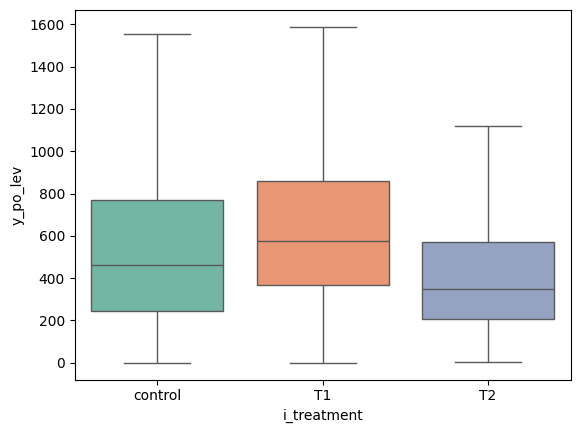

In [155]:
sns.boxplot(data=treatments_df[['y_po_lev','i_treatment']], x="i_treatment", y="y_po_lev",showfliers=False, palette="Set2", hue="i_treatment")


In [63]:
# Normalizing the Levenshtein column
column_to_normalize = 'y_po_lev'

min_value = treatments_df[column_to_normalize].values.min()
max_value = treatments_df[column_to_normalize].values.max()

treatments_df['y_po_lev_norm'] = (treatments_df[column_to_normalize] - min_value) / (max_value - min_value)


<Axes: xlabel='i_treatment', ylabel='y_po_lev_norm'>

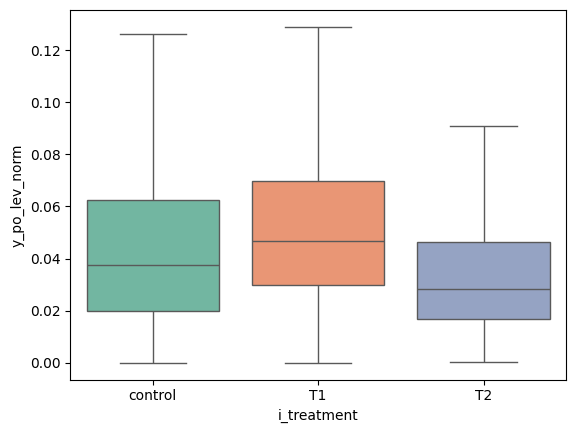

In [64]:
sns.boxplot(data=treatments_df[['y_po_lev_norm','i_treatment']], x="i_treatment", y="y_po_lev_norm",showfliers=False, palette="Set2", hue="i_treatment")


## Cosine Similarity

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def cosine_similarity_strings(row):
    # Vectorize the strings using TF-IDF
    vectorizer = TfidfVectorizer()
    str1=row['code'].strip()
    str2=row['prediction'].strip()
    tfidf_matrix = vectorizer.fit_transform([str1, str2])

    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    
    return cosine_sim[0][0]

In [66]:
treatments_df['y_po_cos'] = treatments_df.apply(cosine_similarity_strings, axis=1)

In [67]:
treatments_df['y_po_cos']

0       0.473827
1       0.810686
2       0.058783
3       0.000000
4       0.618505
          ...   
8764    0.106711
8765    0.199285
8766    0.421444
8767    0.814839
8768    0.917108
Name: y_po_cos, Length: 8769, dtype: float64

In [68]:
treatments_df[['y_po_cos','i_treatment']].groupby('i_treatment').describe()

y_po_cos                                                         \
               count      mean       std  min       25%       50%       75%   
i_treatment                                                                   
T1            2923.0  0.433825  0.241293  0.0  0.258024  0.422385  0.588639   
T2            2923.0  0.576346  0.258105  0.0  0.374087  0.580625  0.799039   
control       2923.0  0.525883  0.249243  0.0  0.338401  0.508177  0.721361   

                  
             max  
i_treatment       
T1           1.0  
T2           1.0  
control      1.0

<Axes: xlabel='i_treatment', ylabel='y_po_cos'>

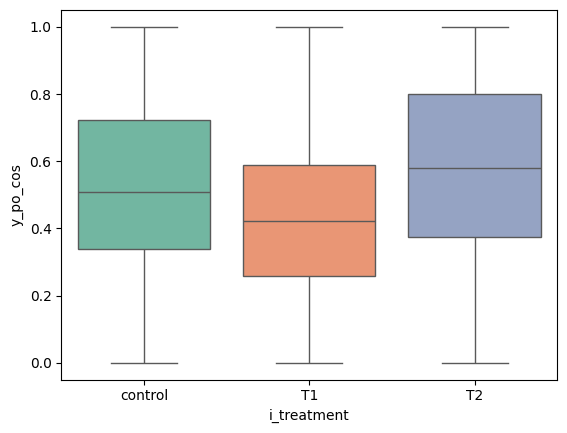

In [69]:
sns.boxplot(data=treatments_df[['y_po_cos','i_treatment']], x="i_treatment", y="y_po_cos",showfliers=False, palette="Set2", hue="i_treatment")


## CodeBLEU per treatment

In [70]:
from codebleu import calc_codebleu

In [71]:
def calculate_codeBLEU(row):
    str1=row['code'].strip()
    str2=row['prediction'].strip()
    return calc_codebleu([str1], [str2], lang="python", weights=(0.25, 0.25, 0.25, 0.25), tokenizer=None)['codebleu']

In [72]:
treatments_df['y_po_codeBLEU']=treatments_df.apply(calculate_codeBLEU, axis=1)

In [73]:
treatments_df['y_po_codeBLEU']

0       0.528323
1       0.703035
2       0.004686
3       0.250000
4       0.223042
          ...   
8764    0.430092
8765    0.369647
8766    0.400655
8767    0.570918
8768    0.862230
Name: y_po_codeBLEU, Length: 8769, dtype: float64

In [74]:
treatments_df[['y_po_codeBLEU','i_treatment']].groupby('i_treatment').describe()

y_po_codeBLEU                                                    \
                    count      mean       std       min       25%       50%   
i_treatment                                                                   
T1                 2923.0  0.457046  0.213927  0.001808  0.283328  0.470365   
T2                 2923.0  0.485817  0.216183  0.015306  0.320406  0.466076   
control            2923.0  0.477526  0.228565  0.004686  0.291803  0.483273   

                            
                  75%  max  
i_treatment                 
T1           0.629762  1.0  
T2           0.631684  1.0  
control      0.658035  1.0

<Axes: xlabel='i_treatment', ylabel='y_po_codeBLEU'>

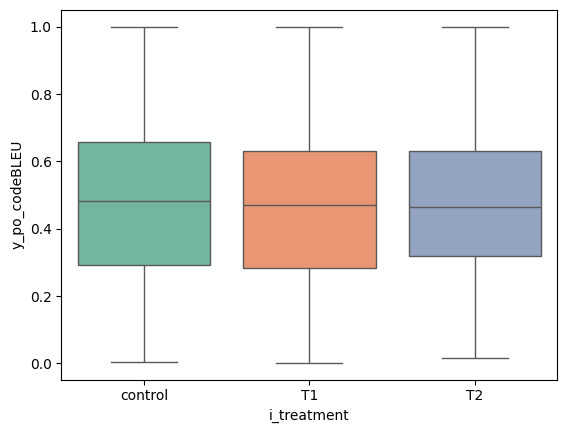

In [ ]:
sns.boxplot(data=treatments_df[['y_po_codeBLEU','i_treatment']], x="i_treatment", y="y_po_codeBLEU",showfliers=False, palette="Set2",hue="i_treatment")


/var/folders/qy/ftnl314s4sx2y_tfvdhs2w680000gn/T/ipykernel_69611/2576337165.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(["T0", "T1", "T2"])
/var/folders/qy/ftnl314s4sx2y_tfvdhs2w680000gn/T/ipykernel_69611/2576337165.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(["T0", "T1", "T2"])
/var/folders/qy/ftnl314s4sx2y_tfvdhs2w680000gn/T/ipykernel_69611/2576337165.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_yticklabels(["T0", "T1", "T2"])


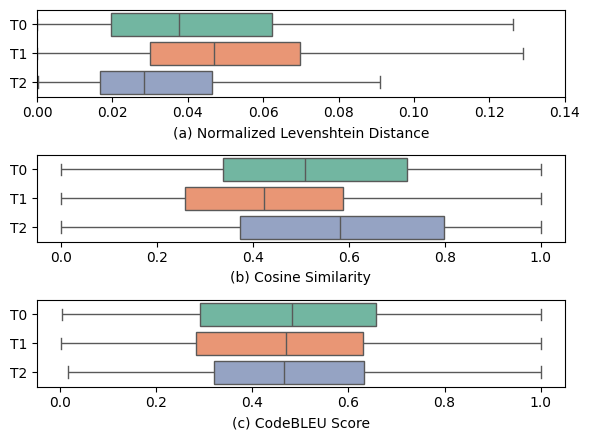

In [235]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(3, 1, figsize=(6,4.5))  # (rows, cols), and adjust figsize



# Plot 1: Total bill vs Tip
sns.boxplot(data=treatments_df[['y_po_lev_norm','i_treatment']], y="i_treatment", x="y_po_lev_norm",showfliers=False, palette="Set2", hue="i_treatment", ax=axes[0])
#axes[0].set_title("Total Bill vs Tip")
axes[0].set_xlim(0, 0.14)  # ymin, ymax
axes[0].set_xlabel("(a) Normalized Levenshtein Distance")
axes[0].set_ylabel("")
axes[0].set_yticklabels(["T0", "T1", "T2"])


# Plot 2: Boxplot by day
sns.boxplot(data=treatments_df[['y_po_cos','i_treatment']], y="i_treatment", x="y_po_cos",showfliers=False, palette="Set2", hue="i_treatment", ax=axes[1])
#axes[1].set_title("Total Bill by Day")
axes[1].set_xlabel("(b) Cosine Similarity")
axes[1].set_ylabel("")
axes[1].set_yticklabels(["T0", "T1", "T2"])
# Plot 3: Histogram of tips
sns.boxplot(data=treatments_df[['y_po_codeBLEU','i_treatment']], y="i_treatment", x="y_po_codeBLEU",showfliers=False, palette="Set2",hue="i_treatment", ax=axes[2])
#axes[2].set_title("Tip Distribution")
axes[2].set_xlabel("(c) CodeBLEU Score")
axes[2].set_ylabel("")
axes[2].set_yticklabels(["T0", "T1", "T2"])
# Adjust layout
plt.tight_layout()
plt.savefig("associational.png", dpi=300, bbox_inches='tight')

plt.show()

/var/folders/qy/ftnl314s4sx2y_tfvdhs2w680000gn/T/ipykernel_69611/2502471936.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["T0", "T1", "T2"])


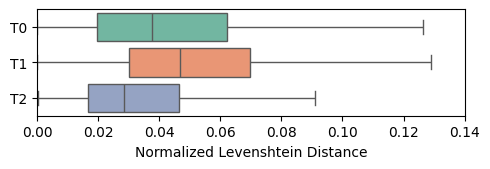

In [231]:
fig, ax = plt.subplots(figsize=(5, 1.8))



# Plot 1: Total bill vs Tip
sns.boxplot(data=treatments_df[['y_po_lev_norm','i_treatment']], y="i_treatment", x="y_po_lev_norm",showfliers=False, palette="Set2", hue="i_treatment", ax=ax)
ax.set_xlim(0, 0.14)  # ymin, ymax
ax.set_xlabel("Normalized Levenshtein Distance")
ax.set_ylabel("")
ax.set_yticklabels(["T0", "T1", "T2"])
plt.tight_layout()
plt.savefig("normalized_lev.png", dpi=300, bbox_inches='tight')

plt.show()

In [152]:
df_all = pd.concat([
 treatments_df[['y_po_lev_norm','i_treatment']],
treatments_df[['y_po_cos','i_treatment']], 
treatments_df[['y_po_codeBLEU','i_treatment']]])

In [153]:
df_all

,y_po_lev_norm,i_treatment,y_po_cos,y_po_codeBLEU
0,0.029567,control,NaN,NaN
1,0.075217,control,NaN,NaN
2,0.062627,control,NaN,NaN
3,0.067826,control,NaN,NaN
4,0.024531,control,NaN,NaN
...,...,...,...,...
8764,NaN,T2,NaN,0.430092
8765,NaN,T2,NaN,0.369647
8766,NaN,T2,NaN,0.400655
8767,NaN,T2,NaN,0.570918


The more input prompt size is close to the GT, the less distance outcome, gt

We expect the following behavior in continues treatments: The more difference lev difference between prompts (i.e. control vs T1, T1 vs T2), the less difference at the potential outcome. We expect a negative correlations or causal effect

In [76]:
from scipy import stats
import itertools

In [77]:
confounders =['w_ast_levels','w_n_whitespaces','w_complexity','w_nloc','w_token_counts','w_n_ast_nodes']

In [78]:
for z0,z1 in itertools.product(confounders,confounders):
    #print(z1)
    tmp= stats.pearsonr(treatments_df[z0],treatments_df[z1])
    spermanr = stats.spearmanr(treatments_df[z0],treatments_df[z1])
    print(z0,z1,tmp, spermanr)

w_ast_levels w_ast_levels PearsonRResult(statistic=np.float64(0.9999999999999999), pvalue=np.float64(0.0)) SignificanceResult(statistic=np.float64(0.9999999999999998), pvalue=np.float64(0.0))
w_ast_levels w_n_whitespaces PearsonRResult(statistic=np.float64(0.4990961343555267), pvalue=np.float64(0.0)) SignificanceResult(statistic=np.float64(0.6822881300127996), pvalue=np.float64(0.0))
w_ast_levels w_complexity PearsonRResult(statistic=np.float64(0.5287915178516047), pvalue=np.float64(0.0)) SignificanceResult(statistic=np.float64(0.5856303844701728), pvalue=np.float64(0.0))
w_ast_levels w_nloc PearsonRResult(statistic=np.float64(0.44719445198749247), pvalue=np.float64(0.0)) SignificanceResult(statistic=np.float64(0.5775515581247451), pvalue=np.float64(0.0))
w_ast_levels w_token_counts PearsonRResult(statistic=np.float64(0.5270006805549071), pvalue=np.float64(0.0)) SignificanceResult(statistic=np.float64(0.6785033697899441), pvalue=np.float64(0.0))
w_ast_levels w_n_ast_nodes PearsonRResul

In [79]:
variables = ['w_token_counts',
 'w_n_ast_errors',
 'w_n_whitespaces',
 'w_complexity',
 'w_ast_levels',
 'w_vocab_size',
 'w_nloc',
 'w_n_ast_nodes',
 'w_n_identifiers',
 'w_n_words',
 'e_n_whitespaces',
 'e_n_words',
 'e_vocab_size',
 'i_n_whitespaces',
 'i_n_words',
 'i_vocab_size']

In [80]:
total=list()
for z0,z1 in itertools.product(variables,variables):
    #print(z1)
    p_correlation= stats.pearsonr(treatments_df[z0],treatments_df[z1]).correlation
    s_correlation = stats.spearmanr(treatments_df[z0],treatments_df[z1]).correlation
    p_pvalue= stats.pearsonr(treatments_df[z0],treatments_df[z1]).pvalue
    s_pvalue = stats.spearmanr(treatments_df[z0],treatments_df[z1]).pvalue
    result = [z0,z1,p_correlation, p_pvalue, s_correlation, s_pvalue]
    total.append(result)
    

In [81]:
total

[['w_token_counts',
  'w_token_counts',
  np.float64(1.0),
  np.float64(0.0),
  np.float64(1.0),
  np.float64(0.0)],
 ['w_token_counts',
  'w_n_ast_errors',
  np.float64(0.19243291704495993),
  np.float64(6.465788564807214e-74),
  np.float64(-0.006175438014218626),
  np.float64(0.5631228622316575)],
 ['w_token_counts',
  'w_n_whitespaces',
  np.float64(0.7357216906875989),
  np.float64(0.0),
  np.float64(0.8101423364901171),
  np.float64(0.0)],
 ['w_token_counts',
  'w_complexity',
  np.float64(0.6507208202748834),
  np.float64(0.0),
  np.float64(0.5764542068763481),
  np.float64(0.0)],
 ['w_token_counts',
  'w_ast_levels',
  np.float64(0.5270006805549071),
  np.float64(0.0),
  np.float64(0.678503369789944),
  np.float64(0.0)],
 ['w_token_counts',
  'w_vocab_size',
  np.float64(0.7561435643892088),
  np.float64(0.0),
  np.float64(0.8375058678828599),
  np.float64(0.0)],
 ['w_token_counts',
  'w_nloc',
  np.float64(0.8536058035354178),
  np.float64(0.0),
  np.float64(0.8466424007951175)

In [82]:
df = pd.DataFrame(total)

# Save to Excel
df.to_excel('output.xlsx', index=False)

In [95]:
df.columns = ['Source', 'Target', 'Pearson','p_value','Spearman','s_value']


In [96]:
df

,Source,Target,Pearson,p_value,Spearman,s_value
0,w_token_counts,w_token_counts,1.000000,0.000000e+00,1.000000,0.000000e+00
1,w_token_counts,w_n_ast_errors,0.192433,6.465789e-74,-0.006175,5.631229e-01
2,w_token_counts,w_n_whitespaces,0.735722,0.000000e+00,0.810142,0.000000e+00
3,w_token_counts,w_complexity,0.650721,0.000000e+00,0.576454,0.000000e+00
4,w_token_counts,w_ast_levels,0.527001,0.000000e+00,0.678503,0.000000e+00
...,...,...,...,...,...,...
251,i_vocab_size,e_n_words,0.204187,3.516045e-83,0.171114,1.324282e-58
252,i_vocab_size,e_vocab_size,0.217361,2.848348e-94,0.193708,6.821262e-75
253,i_vocab_size,i_n_whitespaces,0.673024,0.000000e+00,0.883293,0.000000e+00
254,i_vocab_size,i_n_words,0.968801,0.000000e+00,0.991681,0.000000e+00


In [111]:
df.describe()

,Pearson,p_value,Spearman,s_value
count,256.000000,2.560000e+02,256.000000,2.560000e+02
mean,0.503032,1.877820e-02,0.513446,1.366513e-02
std,0.266876,1.083494e-01,0.293418,9.067013e-02
min,-0.026913,0.000000e+00,-0.056117,0.000000e+00
25%,0.329004,0.000000e+00,0.329812,0.000000e+00
50%,0.500535,0.000000e+00,0.506049,0.000000e+00
75%,0.673811,4.313512e-216,0.755939,5.248654e-220
max,1.000000,8.940819e-01,1.000000,8.446530e-01


In [115]:
matrix = df.pivot(index='Source', columns='Target', values='Pearson')


In [127]:
matrix

,e_n_whitespaces,e_n_words,e_vocab_size,i_n_whitespaces,i_n_words,i_vocab_size,w_ast_levels,w_complexity,w_n_ast_errors,w_n_ast_nodes,w_n_identifiers,w_n_whitespaces,w_n_words,w_nloc,w_token_counts,w_vocab_size
Source,,,,,,,,,,,,,,,,
e_n_whitespaces,1.000000,0.676173,0.607008,0.710397,0.325482,0.288586,0.389838,0.321674,0.010186,0.592623,0.408712,0.760420,0.541176,0.639706,0.567073,0.468260
e_n_words,0.676173,1.000000,0.960973,0.271483,0.210152,0.204187,0.279071,0.307285,0.035568,0.393784,0.350353,0.312252,0.421130,0.336360,0.380404,0.407575
e_vocab_size,0.607008,0.960973,1.000000,0.216369,0.196156,0.217361,0.276859,0.270927,0.039338,0.356512,0.369156,0.249925,0.378887,0.297754,0.340872,0.402449
i_n_whitespaces,0.710397,0.271483,0.216369,1.000000,0.728670,0.673024,0.370395,0.330178,-0.006270,0.630015,0.423370,0.816202,0.587364,0.668325,0.596254,0.501974
i_n_words,0.325482,0.210152,0.196156,0.728670,1.000000,0.968801,0.308985,0.371562,0.026972,0.502574,0.422760,0.398423,0.557656,0.420189,0.466198,0.529936
i_vocab_size,0.288586,0.204187,0.217361,0.673024,0.968801,1.000000,0.330265,0.369886,0.027019,0.478033,0.454024,0.357043,0.537930,0.394605,0.440658,0.552304
w_ast_levels,0.389838,0.279071,0.276859,0.370395,0.308985,0.330265,1.000000,0.528792,-0.026913,0.599344,0.607856,0.499096,0.572454,0.447194,0.527001,0.607923
w_complexity,0.321674,0.307285,0.270927,0.330178,0.371562,0.369886,0.528792,1.000000,0.215297,0.572308,0.530200,0.452098,0.648218,0.557676,0.650721,0.632532
w_n_ast_errors,0.010186,0.035568,0.039338,-0.006270,0.026972,0.027019,-0.026913,0.215297,1.000000,0.032897,0.162245,-0.026715,-0.006193,0.197064,0.192433,-0.001422


In [116]:
full_index = sorted(set(df['Source']) | set(df['Target']))
matrix = matrix.reindex(index=full_index, columns=full_index)
matrix = matrix.combine_first(matrix.T)

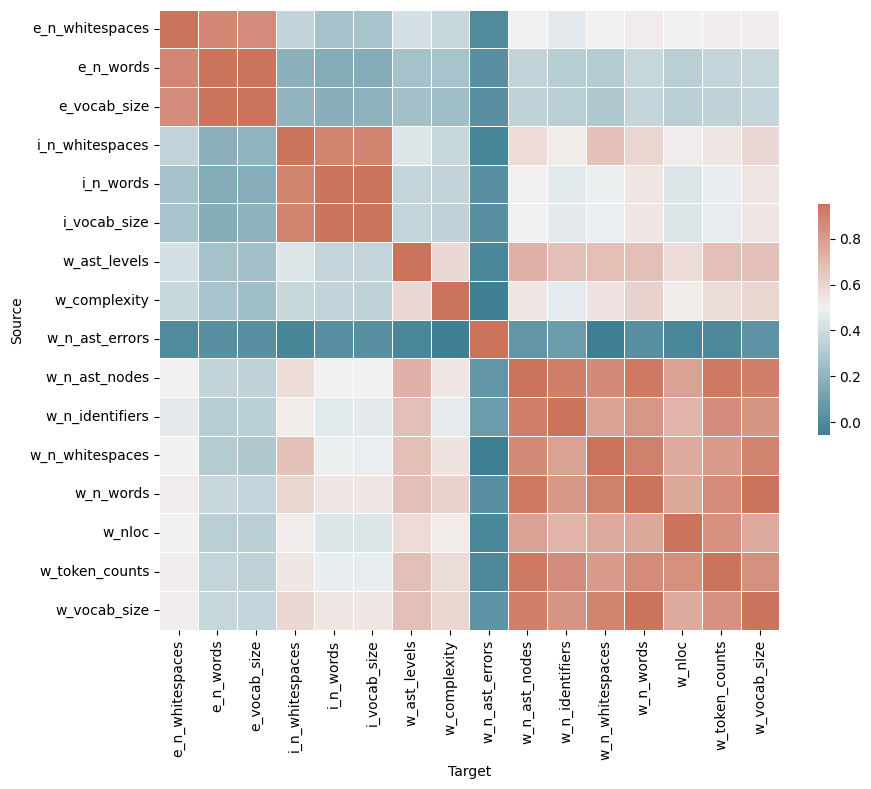

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(256, 20, as_cmap=True)
cmap2=sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, cmap=cmap2, vmax=0.95, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .3})
#sns.heatmap(matrix, annot=True, cmap=cmap, center=0)
#plt.title('Correlation Matrix')
plt.savefig("correlation.png", dpi=300, bbox_inches='tight')
plt.show()


<Figure size 640x480 with 0 Axes>

In [137]:
matrix = df.pivot(index='Source', columns='Target', values='Spearman')


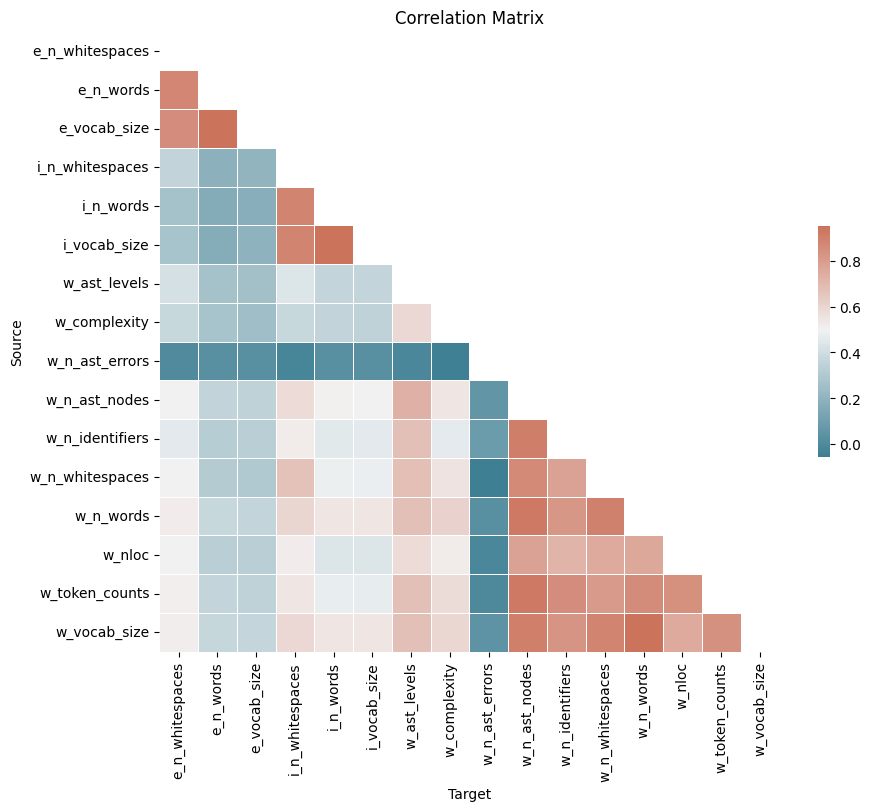

In [140]:
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(256, 20, as_cmap=True)
cmap2=sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, cmap=cmap2, vmax=0.95, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .3})
#sns.heatmap(matrix, annot=True, cmap=cmap, center=0)
plt.title('Correlation Matrix')
plt.show()